# Objective

Build a machine learning model to predict if a credit card application will get approved.

# Description

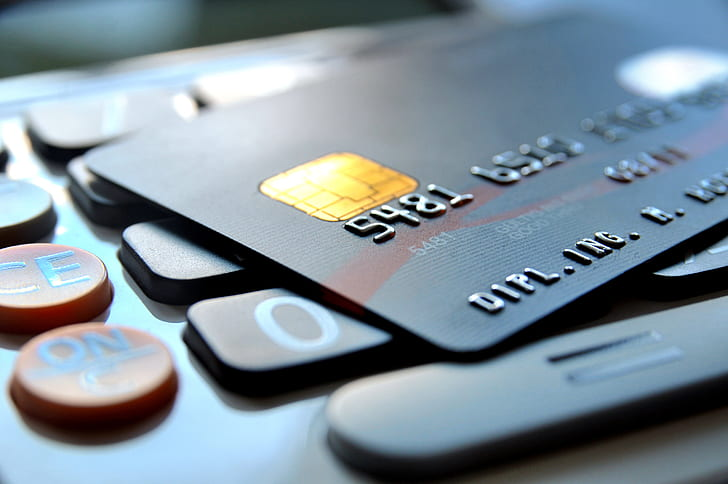

Nowadays, commercial banks receive a lot of applications for credit cards. Many of them get rejected for many reasons, like high loan balances, low income levels, or too many inquiries on an individual's credit report, for example. Manually analyzing these applications is mundane, error-prone, and time-consuming (and time is money!). Luckily, this task can be automated with the power of machine learning and pretty much every commercial bank does so nowadays. In this project, I will try to build an automatic credit card approval predictor using machine learning techniques, just like the real banks do. Essentially, predicting if a credit card application will be approved or not is a [classification](https://en.wikipedia.org/wiki/Statistical_classification) task. 

The dataset used in this project is the [Credit Card Approval dataset](http://archive.ics.uci.edu/ml/datasets/credit+approval) from the UCI Machine Learning Repository.

# Process

## 1. Credit card applications

We'll use the [Credit Card Approval dataset](http://archive.ics.uci.edu/ml/datasets/credit+approval) from the UCI Machine Learning Repository. The structure of this project is as follows:
- First, we will start off by loading and viewing the dataset.
- We will see that the dataset has a mixture of both numerical and non-numerical features, that it contains values from different ranges, plus that it contains a number of missing entries.
- We will have to preprocess the dataset to ensure the machine learning model we choose can make good predictions.
- After our data is in good shape, we will do some basic *Exploratory Data Analysis* (EDA) to build our intuitions.
- Finally, we will build a machine learning model that can predict if an individual's application for a credit card will be accepted.

First, loading and viewing the dataset. We find that since this data is **confidential**, the contributor of the dataset has anonymized the feature names.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Load dataset
cc_apps = pd.read_csv("dataset/crx.data", header = None)
cc_apps.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


## 2. Inspecting the applications (the dataset)

The output may appear a bit confusing at its first sight, but let's try to figure out the most important features of a credit card application. The features of this dataset have been anonymized to protect the privacy, but [this blog](http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html) gives us a pretty good overview of the probable features. 

Based on [this blog](http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html), the probable features in a typical credit card application are `Gender`, `Age`, `Debt`, `Married`, `BankCustomer`, `EducationLevel`, `Ethnicity`, `YearsEmployed`, `PriorDefault`, `Employed`, `CreditScore`, `DriversLicense`, `Citizen`, `ZipCode`, `Income` and finally the `ApprovalStatus`. This gives us a pretty good starting point, and we can map these features with respect to the columns in the output.

As we can see from our first glance at the data, the dataset has a mixture of numerical and non-numerical features. This can be fixed with some preprocessing, but before we do that, let's learn about the dataset a bit more to see if there are other dataset issues that need to be fixed.

In [2]:
# Map the variable names of the columns
col_names = ['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel',
            'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
            'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'ApprovalStatus']
cc_apps.columns = col_names

# Change the name of categorical values for each column to make its more readable
cc_apps['Gender'].replace({'a':'Male', 'b':'Female'}, inplace = True)
cc_apps['ApprovalStatus'].replace({'+':'Yes', '-':'No'}, inplace = True)
cc_apps['PriorDefault'].replace({'t':'True', 'f':'False'}, inplace = True)
cc_apps['Employed'].replace({'t':'True', 'f':'False'}, inplace = True)
cc_apps['DriversLicense'].replace({'t':'True', 'f':'False'}, inplace = True)
cc_apps.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,Female,30.83,0.000,u,g,w,v,1.25,True,True,1,False,g,00202,0,Yes
1,Male,58.67,4.460,u,g,q,h,3.04,True,True,6,False,g,00043,560,Yes
2,Male,24.50,0.500,u,g,q,h,1.50,True,False,0,False,g,00280,824,Yes
3,Female,27.83,1.540,u,g,w,v,3.75,True,True,5,True,g,00100,3,Yes
4,Female,20.17,5.625,u,g,w,v,1.71,True,False,0,False,s,00120,0,Yes


In [3]:
# Print DataFrame information
display(cc_apps.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  ApprovalStatus  690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


None

- We see that `Age` is represented as an `object` dtype which is **not** our desirable dtype. We need to cenvert it to numerical dtype (`float` or `int`).
- The rest of the columns dtype is looking good for now.

In [4]:
# Convert age column to numeric dtype
cc_apps['Age'] = pd.to_numeric(cc_apps['Age'], errors='coerce')
cc_apps['Age'].dtype

dtype('float64')

In [5]:
# Print summary statistics
display(cc_apps.describe())

,Age,Debt,YearsEmployed,CreditScore,Income
count,678.000000,690.000000,690.000000,690.00000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,1017.385507
std,11.957862,4.978163,3.346513,4.86294,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,395.500000
max,80.250000,28.000000,28.500000,67.00000,100000.000000


In [6]:
# Inspect missing values in the dataset (numerical column)
num_columns = [column for column in col_names if cc_apps[column].dtype != 'object']
cc_apps[num_columns].isnull().sum()

Age              12
Debt              0
YearsEmployed     0
CreditScore       0
Income            0
dtype: int64

In [7]:
# Inspect missing values in the dataset (categorical column)
cat_columns = [column for column in col_names if cc_apps[column].dtype == 'object']
for i in cat_columns:
    print('unique values in', i, '=', cc_apps[i].unique(), '\n')

unique values in Gender = ['Female' 'Male' '?'] 

unique values in Married = ['u' 'y' '?' 'l'] 

unique values in BankCustomer = ['g' 'p' '?' 'gg'] 

unique values in EducationLevel = ['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j' '?'] 

unique values in Ethnicity = ['v' 'h' 'bb' 'ff' 'j' 'z' '?' 'o' 'dd' 'n'] 

unique values in PriorDefault = ['True' 'False'] 

unique values in Employed = ['True' 'False'] 

unique values in DriversLicense = ['False' 'True'] 

unique values in Citizen = ['g' 's' 'p'] 

unique values in ZipCode = ['00202' '00043' '00280' '00100' '00120' '00360' '00164' '00080' '00180'
 '00052' '00128' '00260' '00000' '00320' '00396' '00096' '00200' '00300'
 '00145' '00500' '00168' '00434' '00583' '00030' '00240' '00070' '00455'
 '00311' '00216' '00491' '00400' '00239' '00160' '00711' '00250' '00520'
 '00515' '00420' '?' '00980' '00443' '00140' '00094' '00368' '00288'
 '00928' '00188' '00112' '00171' '00268' '00167' '00075' '00152' '00176'
 '00329' '00212' '

## 3. Splitting the dataset into train and test sets

Now, we will split our data into train set and test set to prepare our data for two different phases of machine learning modeling: training and testing. Ideally, no information from the test data should be used to preprocess the training data or should be used to direct the training process of a machine learning model. Hence, we first split the data and then preprocess it.

Also, features like `DriversLicense` and `ZipCode` are not as important as the other features in the dataset for predicting credit card approvals. To get a better sense, we can measure their [statistical correlation](https://realpython.com/numpy-scipy-pandas-correlation-python/) to the labels of the dataset. But this is out of scope for this project. We should drop them to design our machine learning model with the best set of features. In Data Science literature, this is often referred to as *feature selection*.

In [8]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Drop the features DriversLicense and ZipCode
cc_apps = cc_apps.drop(['DriversLicense', 'ZipCode'], axis = 1)

# Split into train and test sets
cc_apps_train, cc_apps_test = train_test_split(cc_apps, test_size=0.30, random_state=42, stratify = cc_apps['ApprovalStatus'])

In [9]:
# check the shape
print(cc_apps.shape)
print(cc_apps_train.shape)
print(cc_apps_test.shape)

(690, 14)
(483, 14)
(207, 14)


## 4. Handling the missing values

### 4.1. Handling the missing values of numerical columns

Now we've split our data, we can handle some of the issues we identified when inspecting the DataFrame, including:
- Our dataset contains both numeric and non-numeric data (specifically data that are of `float64`, `int64` and `object` types). Specifically, the features `Age`, `Debt`, `YearsEmployed`, `CreditScore` and `Income` contain numeric values (of types float64, float64, float64, int64 and int64 respectively) and all the other features contain non-numeric values.
- The dataset also contains values from several ranges. Some features have a value range of 13 - 80, some have a range of 0 - 28, some have a range of 2 - 67, and some have a range of 1017 - 100000. Apart from these, we can get useful statistical information (like `mean`, `max`, and `min`) about the features that have numerical values.
- Finally, the dataset has missing values, which we'll take care of in this section. The missing values in the dataset are labeled with `'?'`.

Now, let's replace these missing value question marks (`'?'`) with `NaN` for all of the columns in dataset.

In [10]:
# Import numpy
import numpy as np

# Replace all of the '?'s with NaN in the train and test sets
cc_apps_train = cc_apps_train.replace({'?':np.nan})
cc_apps_test = cc_apps_test.replace({'?':np.nan})

We replaced all the question marks with `NaN`s. This is going to help us in the next missing value treatment that we are going to perform.

An important question that gets raised here is why are we giving so much importance to missing values? Can't they be just ignored? Ignoring missing values can affect the performance of a machine learning model heavily. While ignoring the missing values our machine learning model may miss out on information about the dataset that may be useful for its training. Then, there are many models which cannot handle missing values implicitly such as Linear Discriminant Analysis (LDA).

So, to avoid this problem, we are going to impute the missing values with a strategy called mean imputation. This strategy will be performed in the **numerical columns**.

In [11]:
# Impute the missing values with mean imputation
cc_apps_train.fillna(cc_apps_train.mean(), inplace=True)
cc_apps_test.fillna(cc_apps_test.mean(), inplace=True)

# Count the number of NaNs in the datasets and print the counts to verify
print(cc_apps_train[num_columns].isnull().sum())
print(cc_apps_test[num_columns].isnull().sum())

Age              0
Debt             0
YearsEmployed    0
CreditScore      0
Income           0
dtype: int64
Age              0
Debt             0
YearsEmployed    0
CreditScore      0
Income           0
dtype: int64


### 4.2. Handling the missing values of categorical columns

We have successfully taken care of the missing values present in the **numeric columns**. There are still some missing values to be imputed for columns `Gender`, `Married`, `BankCustomer`, `EducationLevel`, and `Ethnicity`. All of these columns contain **non-numeric data** and this is why the mean imputation strategy would not work here. This needs a different treatment.

We are going to impute these missing values with the most frequent values as present in the respective columns. This is [good practice](https://www.datacamp.com/community/tutorials/categorical-data) when it comes to imputing missing values for categorical data in general.

In [12]:
# missing values in categorical columns
cat_columns = [column for column in cc_apps_train.columns if cc_apps_train[column].dtype == 'object']
print(cc_apps_train[cat_columns].isnull().sum(), '\n')
print(cc_apps_test[cat_columns].isnull().sum())

Gender            11
Married            5
BankCustomer       5
EducationLevel     8
Ethnicity          8
PriorDefault       0
Employed           0
Citizen            0
ApprovalStatus     0
dtype: int64 

Gender            1
Married           1
BankCustomer      1
EducationLevel    1
Ethnicity         1
PriorDefault      0
Employed          0
Citizen           0
ApprovalStatus    0
dtype: int64


In [13]:
# Iterate over each column of cc_apps_train
for col in cc_apps_train.columns:
    # Check if the column is of object type
    if cc_apps_train[col].dtypes == 'object':
        # Impute with the most frequent value
        cc_apps_train = cc_apps_train.fillna(cc_apps_train[col].value_counts().index[0])
        cc_apps_test = cc_apps_test.fillna(cc_apps_test[col].value_counts().index[0])


# Count the number of NaNs in the dataset and print the counts to verify
print(cc_apps_train[cat_columns].isnull().sum(), '\n')
print(cc_apps_test[cat_columns].isnull().sum())

Gender            0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
PriorDefault      0
Employed          0
Citizen           0
ApprovalStatus    0
dtype: int64 

Gender            0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
PriorDefault      0
Employed          0
Citizen           0
ApprovalStatus    0
dtype: int64


## 5. Exploratory Data Analysis (EDA)

After cleansing the dataset, we will perform standard EDA to make some intuitions in this dataset.

In [14]:
# concatenate the 'cc_apps_train' and 'cc_apps_test' into a single DataFrame
df = pd.concat([cc_apps_train, cc_apps_test])

In [15]:
df.sort_index(inplace = True)
df.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income,ApprovalStatus
0,Female,30.83,0.000,u,g,w,v,1.25,True,True,1,g,0,Yes
1,Male,58.67,4.460,u,g,q,h,3.04,True,True,6,g,560,Yes
2,Male,24.50,0.500,u,g,q,h,1.50,True,False,0,g,824,Yes
3,Female,27.83,1.540,u,g,w,v,3.75,True,True,5,g,3,Yes
4,Female,20.17,5.625,u,g,w,v,1.71,True,False,0,s,0,Yes


In [16]:
# group column names based on dtype
import matplotlib.pyplot as plt
import seaborn as sns
cat_columns = [column for column in df.columns if df[column].dtype == 'object']
num_columns = [column for column in df.columns if df[column].dtype != 'object']

### 5.1. Standard EDA

#### Statistical Summary of Columns

Since our dataset is **confidential**, there are some unknown meaning from the categorical values, like `Married`, `BankCustomer`, `EducationLevel`, and `Ethnicity`.

In [17]:
# statistical summaries for numerical and categorical columns
display(df[num_columns].describe())
display(df[cat_columns].describe())

,Age,Debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.000000,690.00000,690.000000
mean,31.568139,4.758725,2.223406,2.40000,1017.385507
std,11.853273,4.978163,3.346513,4.86294,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000
25%,22.670000,1.000000,0.165000,0.00000,0.000000
50%,28.625000,2.750000,1.000000,0.00000,5.000000
75%,37.707500,7.207500,2.625000,3.00000,395.500000
max,80.250000,28.000000,28.500000,67.00000,100000.000000


,Gender,Married,BankCustomer,EducationLevel,Ethnicity,PriorDefault,Employed,Citizen,ApprovalStatus
count,690,690,690,690,690,690,690,690,690
unique,2,4,4,15,10,2,2,3,2
top,Female,u,g,c,v,True,False,g,No
freq,480,519,519,137,399,361,395,625,383


#### Univariate Analysis

1. Performing boxplot to detect outliers in the dataset. 
2. Performing histogram plot to examine the distribution of numerical variables.

As we can see there are many outliers in this dataset but these outliers seem to be within a range that is still understandable and acceptable. All of the the numerical variables seem to have positively skewed distribution.

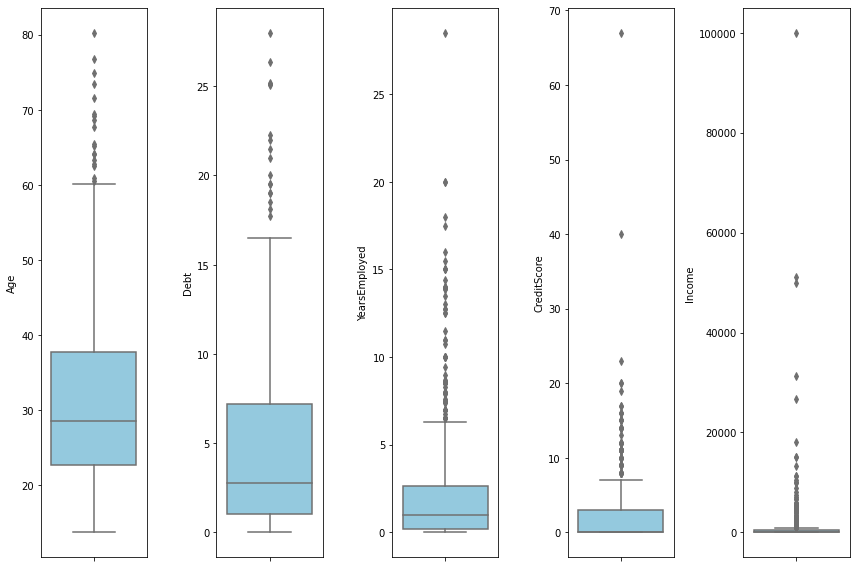

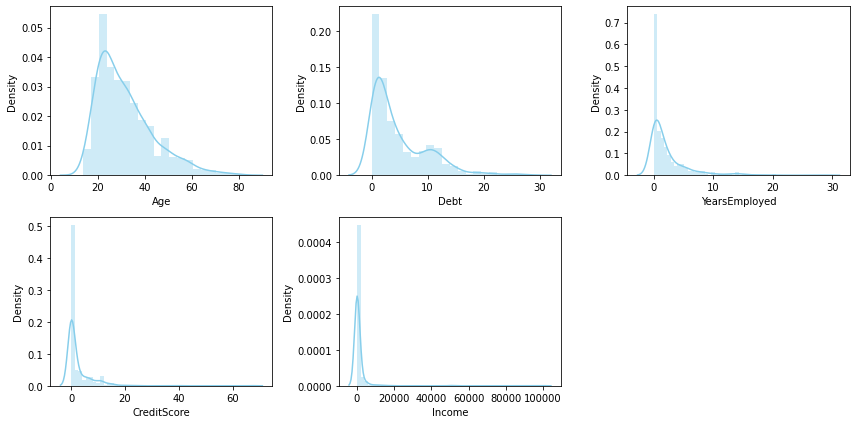

In [18]:
# plotting boxplots
plt.figure(figsize=(12,8))
for i in range(0, len(num_columns)):
    plt.subplot(1, len(num_columns), i+1)
    sns.boxplot(y=df[num_columns[i]], color='skyblue')
    plt.tight_layout()
    
# plotting histograms
plt.figure(figsize=(12,6))
features = num_columns
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=df[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

#### Multivariate Analysis

After creating a heatmap plot containing a correlation matrix for categorical variables, we got some insights there.
- Features that greatly affect the `ApprovalStatus` is `PriorDefault` and `Employed`. These look like reasonable.
- `BankCustomer` and `Married` are correlated each other with the highest correlation value. 
- `EducationLevel` -- `Ethnicity`, `Employed` -- `PriorDefault`, and `ApprovalStatus` -- `Employed` have low to middle correlation values.

The heatmap plot of numerical variables.
- `CreditScore`, `YearsEmployed`, and `Debt` probably affect the `ApprovalStatus`.

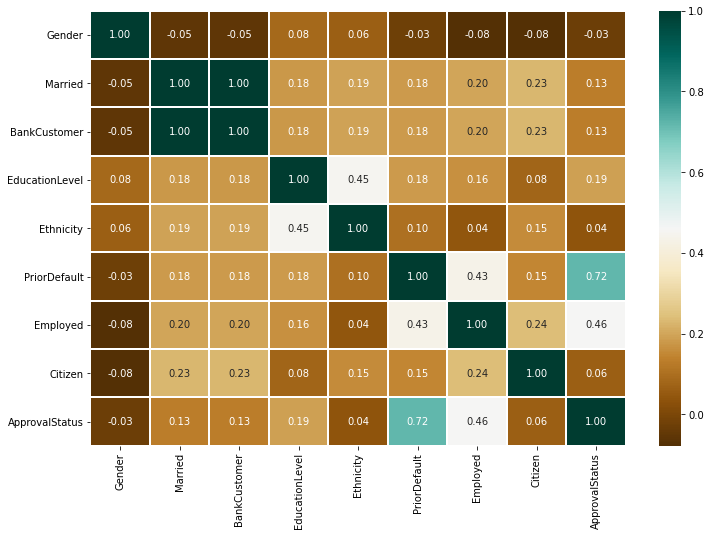

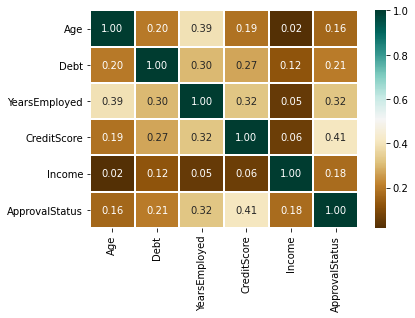

In [19]:
# pearson correlation for the categorical columns
plt.figure(figsize=(12, 8))
cat_correlation = df[cat_columns].apply(lambda x: pd.factorize(x)[0]).corr()
sns.heatmap(cat_correlation, annot=True, fmt='.2f', cmap = 'BrBG', linewidths=0.1)
plt.show()

# pearson correlation for numerical columns
df_num_to_target = df[num_columns+['ApprovalStatus']]
df_num_to_target.ApprovalStatus = df_num_to_target.ApprovalStatus.apply(lambda x: 1 if x == 'Yes' else 0)
num_correlation = df_num_to_target.corr()
sns.heatmap(num_correlation, annot=True, fmt='.2f', cmap = 'BrBG', linewidths=0.1)
plt.show()

#### Pair plot for the numerical data

Insights:
- Low `CreditScore` and `Income` tend to have disapproval of the credit card.

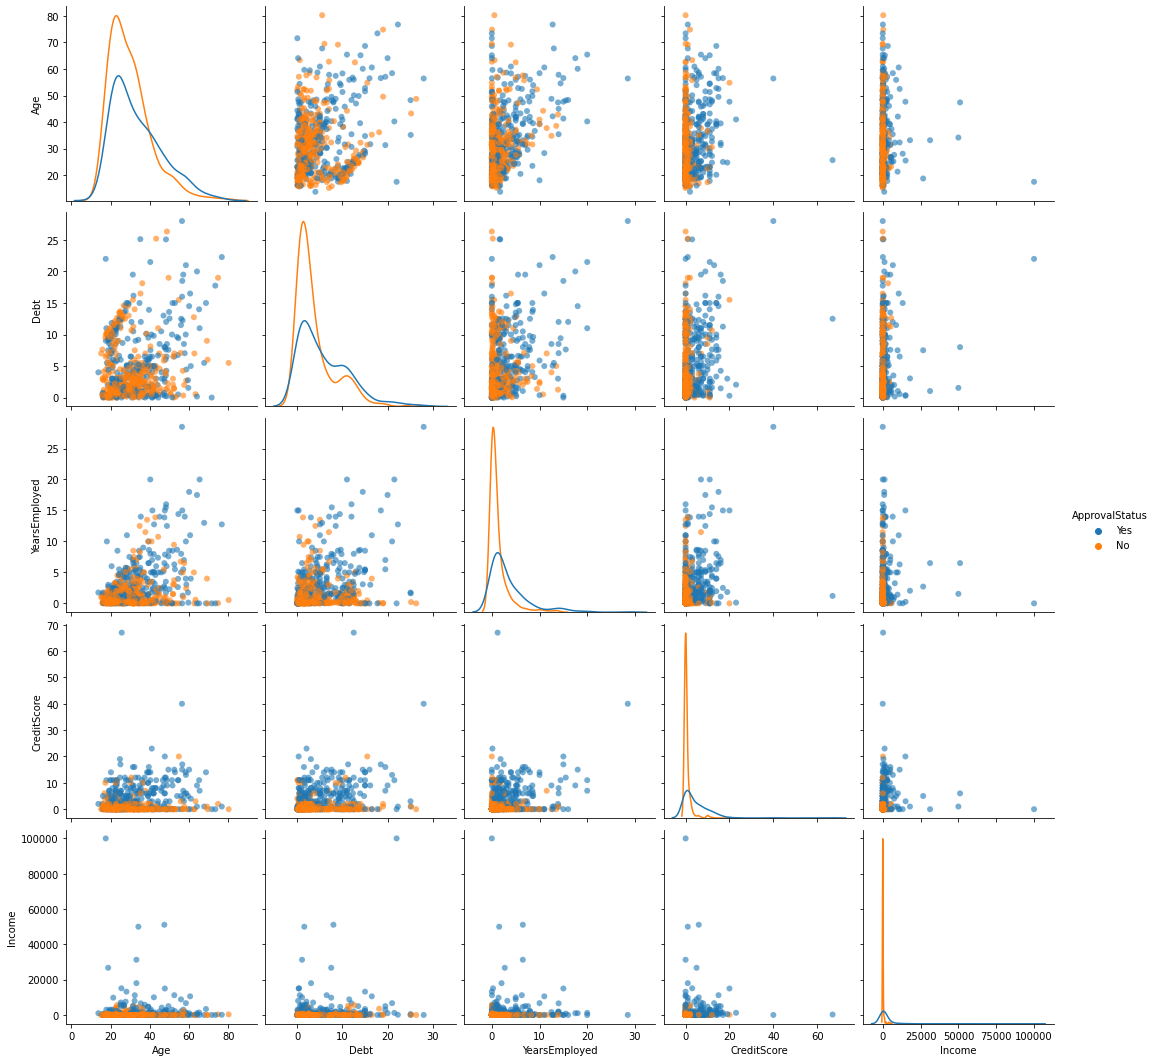

In [20]:
# pairplot for numerical columns (tenure, MonthlyCharges, TotalCharges)
sns.pairplot(data = df, hue = 'ApprovalStatus', height=3,
            plot_kws=dict(marker="o", alpha=0.6, edgecolor='none'),
            diag_kws=dict(fill=False))

## 6. Preprocessing the data

The missing values are now successfully handled.

There is still some minor but essential data preprocessing needed before we proceed towards building our machine learning model. We are going to divide these remaining preprocessing steps into two main tasks:
1. Convert the non-numeric data into numeric (one-hot encoding).
2. Scale the feature values to a uniform range.

### 6.1. One-hot encoding

First, we will be converting all the non-numeric values into numeric ones. We do this because not only it results in a faster computation but also many machine learning models (like XGBoost) (and especially the ones developed using scikit-learn) require the data to be in a strictly numeric format. We will do this by using the `get_dummies()` method from pandas.

In [21]:
# Convert the categorical features in the train and test sets independently
cc_apps_train = pd.get_dummies(cc_apps_train)
cc_apps_test = pd.get_dummies(cc_apps_test)

# Reindex the columns of the test set aligning with the train set
cc_apps_test = cc_apps_test.reindex(columns=cc_apps_train.columns, fill_value=0)
cc_apps_test.head()

,Age,Debt,YearsEmployed,CreditScore,Income,Gender_Female,Gender_Male,Married_Female,Married_l,Married_u,...,Ethnicity_z,PriorDefault_False,PriorDefault_True,Employed_False,Employed_True,Citizen_g,Citizen_p,Citizen_s,ApprovalStatus_No,ApprovalStatus_Yes
149,52.83,15.000,5.50,14,2200,0,1,0,0,1,...,0,0,1,0,1,1,0,0,0,1
585,73.42,17.750,0.00,0,0,1,0,0,0,1,...,0,0,1,1,0,1,0,0,0,1
90,62.50,12.750,5.00,0,0,1,0,0,0,0,...,0,0,1,1,0,1,0,0,1,0
575,32.25,0.165,3.25,1,8000,1,0,0,0,0,...,0,0,1,0,1,1,0,0,0,1
132,47.42,8.000,6.50,6,51100,0,1,0,0,1,...,0,0,1,0,1,1,0,0,0,1


### 6.2. Normalizing numerical columns

Now, we are only left with one final preprocessing step of scaling before we can fit a machine learning model to the data.

Now, let's try to understand what these scaled values mean in the real world. Let's use `CreditScore` as an example. The credit score of a person is their creditworthiness based on their credit history. The higher this number, the more financially trustworthy a person is considered to be. So, a `CreditScore` of 1 is the highest since we're rescaling all the values to the range of 0-1.

In [22]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

# Normalize training set
dummy_train = scaler.fit_transform(cc_apps_train[num_columns])
dummy_train = pd.DataFrame(dummy_train, columns = num_columns, 
                           index = cc_apps_train[num_columns].index)                   
for column in dummy_train.columns:
    cc_apps_train[column] = dummy_train[column]

# Normalize test set
dummy_test = scaler.fit_transform(cc_apps_test[num_columns])
dummy_test = pd.DataFrame(dummy_test, columns = num_columns, 
                          index = cc_apps_test[num_columns].index)                
for column in dummy_test.columns:
    cc_apps_test[column] = dummy_test[column]

## 7. Fitting a logistic regression model to the train set

According to UCI, our dataset contains more instances that correspond to "Denied" status than instances corresponding to "Approved" status. Specifically, out of 690 instances, there are 383 (55.5%) applications that got denied and 307 (44.5%) applications that got approved. The samples of our target variable, approved or not, in this dataset is nearly balanced.

This gives us a benchmark. A good machine learning model should be able to accurately predict the status of the applications with respect to these statistics.

Which model should we pick? A question to ask is: are the features that affect the credit card approval decision process correlated with each other? Although we can measure correlation, that is outside the scope of this project, so we'll rely on our intuition that they indeed are correlated for now. Because of this correlation, we'll take advantage of the fact that generalized linear models perform well in these cases. Let's start our machine learning modeling with a **Logistic Regression model** (a generalized linear model).

In [23]:
# split the data into features and target variable
X_train = cc_apps_train.drop(['ApprovalStatus_No', 'ApprovalStatus_Yes'], axis = 1).values
y_train = cc_apps_train['ApprovalStatus_Yes'].values

X_test = cc_apps_test.drop(['ApprovalStatus_No', 'ApprovalStatus_Yes'], axis = 1).values
y_test = cc_apps_test['ApprovalStatus_Yes'].values

In [24]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(X_train, y_train)

LogisticRegression()

## 8. Making predictions and evaluating performance

We will now evaluate our model on the test set with respect to [classification accuracy](https://developers.google.com/machine-learning/crash-course/classification/accuracy). But we will also take a look the model's [confusion matrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/). In the case of predicting credit card applications, it is important to see if our machine learning model is equally capable of predicting approved and denied status, in line with the frequency of these labels in our original dataset. If our model is not performing well in this aspect, then it might end up approving the application that should have not been approved. The confusion matrix helps us to view our model's performance from these aspects.

Accuracy of logistic regression classifier:  0.8695652173913043


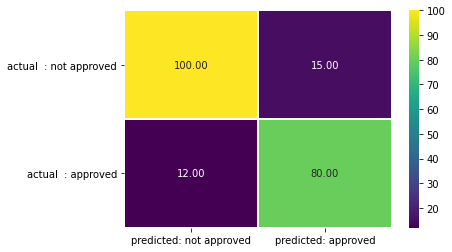

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       115
           1       0.84      0.87      0.86        92

    accuracy                           0.87       207
   macro avg       0.87      0.87      0.87       207
weighted avg       0.87      0.87      0.87       207



In [25]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report

# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(X_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(X_test, y_test))

# Print the confusion matrix of the logreg model
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='.2f', cmap = 'viridis', linewidths=0.1,  
            xticklabels=['predicted: not approved', 'predicted: approved'],
            yticklabels=['actual  : not approved', 'actual  : approved'])
plt.show()

# Print the classification report of metrics
print(classification_report(y_test, y_pred))

Our model was pretty good! In fact, it was able to yield an accuracy score of 87%. The resulting confusion matrix and other model performance metrics show pretty good values too. 

For the confusion matrix, **the first element** of the of the first row of the confusion matrix denotes the `true negatives` meaning the number of negative instances (**denied applications**) predicted by the model correctly. And the last element of the second row of the confusion matrix denotes the `true positives` meaning the number of positive instances (**approved applications**) predicted by the model correctly.

## 9. Grid searching and making the model perform better

But if we hadn't got a perfect score what's to be done?. We can perform a [grid search](https://machinelearningmastery.com/how-to-tune-algorithm-parameters-with-scikit-learn/) of the model parameters to improve the model's ability to predict credit card approvals. This process is called **hyperparameter tuning**.

[scikit-learn's implementation of logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) consists of different hyperparameters but we will grid search over the following two:
- `C` hyperparameter to specify the regularization strength.
- `penalty` hyperparameter to specify the norm of the penalty.

In [26]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
c_space = np.logspace(-5, 8, 20)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
param_grid

{'C': array([1.00000000e-05, 4.83293024e-05, 2.33572147e-04, 1.12883789e-03,
        5.45559478e-03, 2.63665090e-02, 1.27427499e-01, 6.15848211e-01,
        2.97635144e+00, 1.43844989e+01, 6.95192796e+01, 3.35981829e+02,
        1.62377674e+03, 7.84759970e+03, 3.79269019e+04, 1.83298071e+05,
        8.85866790e+05, 4.28133240e+06, 2.06913808e+07, 1.00000000e+08]),
 'penalty': ['l1', 'l2'],
 'solver': ['liblinear']}

## 10. Finding the best performing model

We have defined the grid of hyperparameter values and converted them into a single dictionary format which `GridSearchCV()` expects as one of its parameters. Now, we will begin the grid search to see which values perform best.

We will instantiate `GridSearchCV()` with our earlier logreg model with all the data we have. We will also instruct `GridSearchCV()` to perform a [cross-validation](https://www.dataschool.io/machine-learning-with-scikit-learn/) of 5-folds.

In [27]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Fit grid_model to the data
grid_model.fit(X_train, y_train)

# Summarize results
best_score, best_params = grid_model.best_score_, grid_model.best_params_
print("Best score of GridSearchCV on the training set: {0:.3f} using {1}".format(best_score, best_params))

Best score of GridSearchCV on the training set: 0.853 using {'C': 0.026366508987303583, 'penalty': 'l2', 'solver': 'liblinear'}


Accuracy of logistic regression classifier:  0.8840579710144928


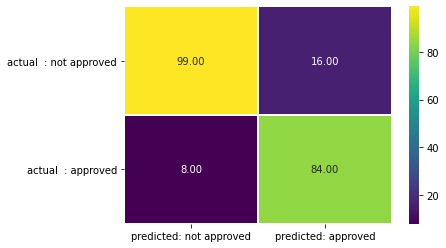

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       115
           1       0.84      0.91      0.87        92

    accuracy                           0.88       207
   macro avg       0.88      0.89      0.88       207
weighted avg       0.89      0.88      0.88       207



In [28]:
# Extract the best model and evaluate it on the test set
best_model = grid_model.best_estimator_
print("Accuracy of logistic regression classifier: ", best_model.score(X_test,y_test))

# Print the confusion matrix of the logreg model
y_pred = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='.2f', cmap = 'viridis', linewidths=0.1,  
            xticklabels=['predicted: not approved', 'predicted: approved'],
            yticklabels=['actual  : not approved', 'actual  : approved'])
plt.show()

# Print the classification report of metrics
print(classification_report(y_test, y_pred))

- After performing `GridSearchCV`, we get our best model with score on the training set is 0.853 while it is using 0.02636 as a value of the `C` hyperparameter with "l2" norm as the `penalty` hyperparameter.
- The accuracy of the model has improved from **86.9%** to **88.4%** and the other metrics (precision, recall, f1-score) of the model performance has improved too.
- We have improved our model performance by using `GridSearchCV`.